# USP test of on continuous data

We demonstrate how the [USP test of independence](https://doi.org/10.1098/rspa.2021.0549) can be applied to continuous data.

For that we bin the data first along each dimension and use the bin indices. This is easy to do with boost-histogram. We apply the test to independent and correlated data.

Note: A test of independence is stronger than a test for zero correlation. A test of independence can also detect dependencies which give zero correlation. 

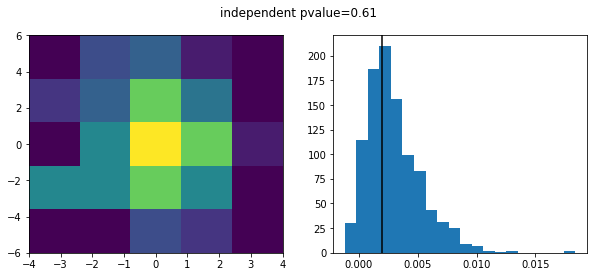

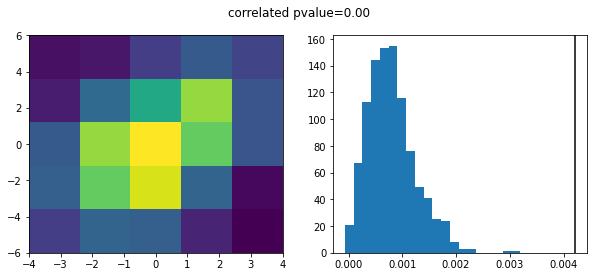

In [6]:
from resample import permutation as perm
import matplotlib.pyplot as plt
import numpy as np
import boost_histogram as bh

rng = np.random.default_rng(1)

x1 = rng.normal(0, 2, size=100)
y1 = rng.normal(0, 3, size=100)

cov = np.empty((2, 2))
cov[0, 0] = 2 ** 2
cov[1, 1] = 3 ** 2
rho = 0.5
cov[0, 1] = rho * np.sqrt(cov[0, 0] * cov[1, 1])
cov[1, 0] = cov[0, 1]

xy2 = rng.multivariate_normal([0, 0], cov, size=500)

d = {"independent": (x1, y1), "correlated": xy2.T}

for label, (x, y) in d.items():

    h = bh.Histogram(bh.axis.Regular(5, -4, 4),
                     bh.axis.Regular(5, -6, 6))
    h.fill(x, y)

    ix, iy = h.axes.index(x, y)
    r = perm.usp(ix, iy)

    fig, ax = plt.subplots(1, 2, figsize=(10, 4))
    plt.sca(ax[0])
    plt.pcolormesh(h.axes[0].edges, h.axes[1].edges, h.values().T)
    plt.sca(ax[1])
    plt.hist(r.samples, bins=20)
    plt.axvline(r.statistic, color="k")
    plt.suptitle(f"{label} pvalue={r.pvalue:.2f}");